In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# import dask.dataframe as dd
from matplotlib import rcParams
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Feature Transformations

In [3]:
#Read df_new csv file
df_new = pd.read_csv('df_new.csv')

## Split data train and test

In [4]:
from sklearn.model_selection import train_test_split
# define X and y
X = df_new.drop('Churn', axis=1)
y = df_new['Churn']
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Balancing Data

In [5]:
# data balancing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Modeling

## Logistic Regression Model

Accuracy:  0.7771469127040455
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1036
           1       0.56      0.74      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.81      0.78      0.79      1409



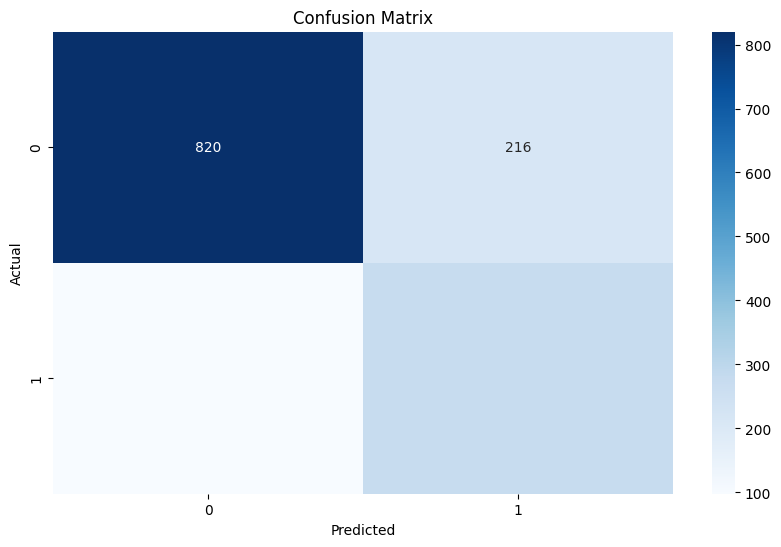

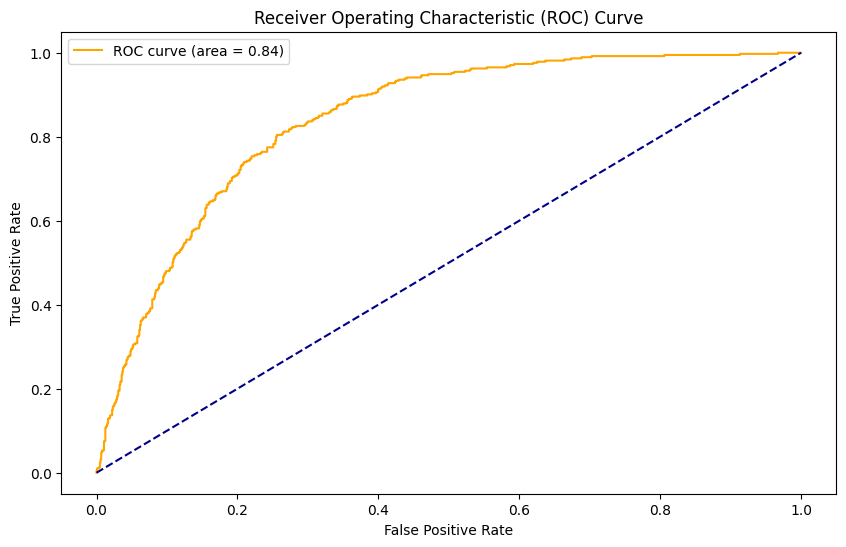

In [6]:
# train model using Logistic Regression
from sklearn.linear_model import LogisticRegression

# Train Model
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)

# Predict
y_pred_LR = model_LR.predict(X_test) 

# Evaluate Model
accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR, average="weighted")
recall_LR = recall_score(y_test, y_pred_LR, average="weighted")
f1_LR = f1_score(y_test, y_pred_LR, average="weighted")

print('Accuracy: ', accuracy_LR)
print('Classification Report: \n', classification_report(y_test, y_pred_LR))

# confusion matrix
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_LR.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Random Forest Model

Accuracy:  0.7693399574166075
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1036
           1       0.56      0.60      0.58       373

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.77      0.77      0.77      1409



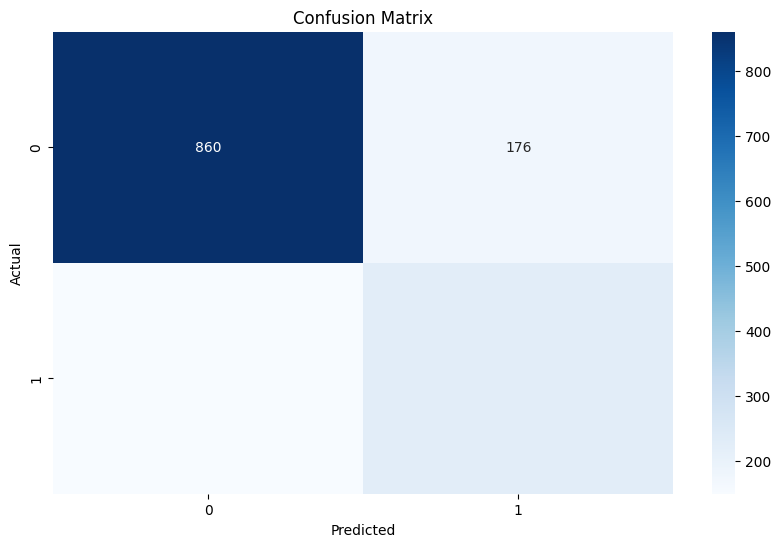

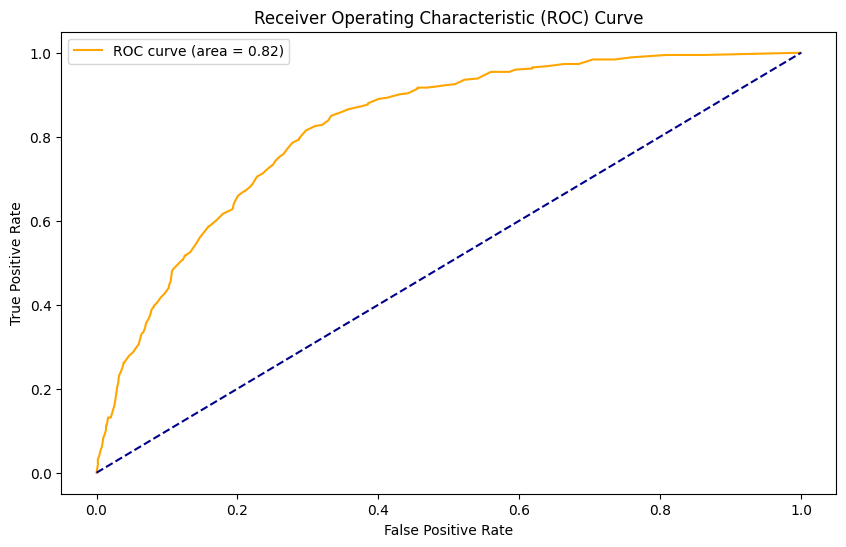

In [7]:
# train model using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Model
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

# Predict
y_pred_RF = model_RF.predict(X_test)

# Evaluate Model
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF, average="weighted")
recall_RF = recall_score(y_test, y_pred_RF, average="weighted")
f1_RF = f1_score(y_test, y_pred_RF, average="weighted")

print('Accuracy: ', accuracy_RF)
print('Classification Report: \n', classification_report(y_test, y_pred_RF))

# confusion matrix
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_RF.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Decision Tree Model

Accuracy:  0.7601135557132718
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1036
           1       0.54      0.68      0.60       373

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



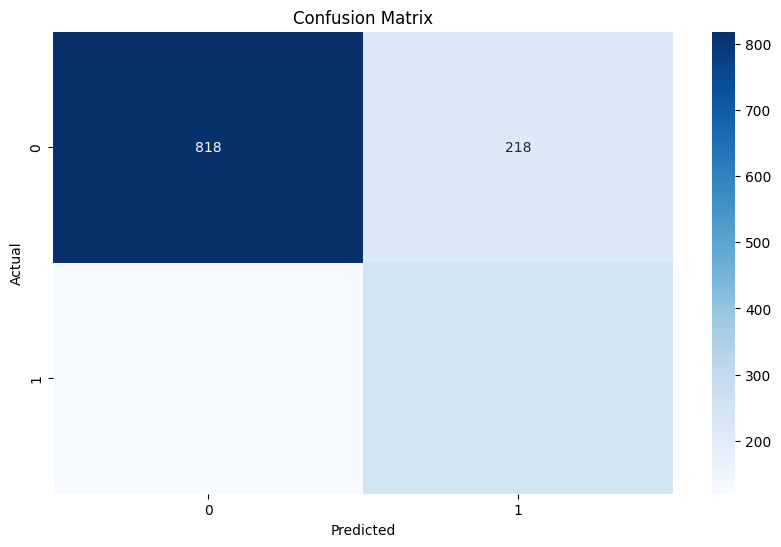

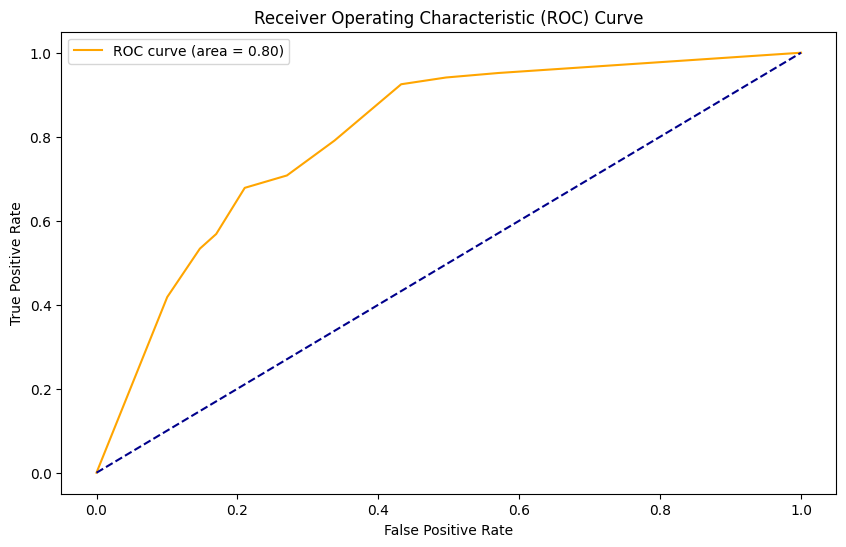

In [8]:
# train model using Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train Model
model_DT = DecisionTreeClassifier(random_state=42, max_leaf_nodes = 10, criterion = 'gini')
model_DT.fit(X_train, y_train)

# Predict
y_pred_DT = model_DT.predict(X_test)

# Evaluate Model
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT, average="weighted")
recall_DT = recall_score(y_test, y_pred_DT, average="weighted")
f1_DT = f1_score(y_test, y_pred_DT, average="weighted")

print('Accuracy: ', accuracy_DT)
print('Classification Report: \n', classification_report(y_test, y_pred_DT))

# confusion matrix
conf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_DT, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_DT.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Melihat banyak tree yang akan digunakan

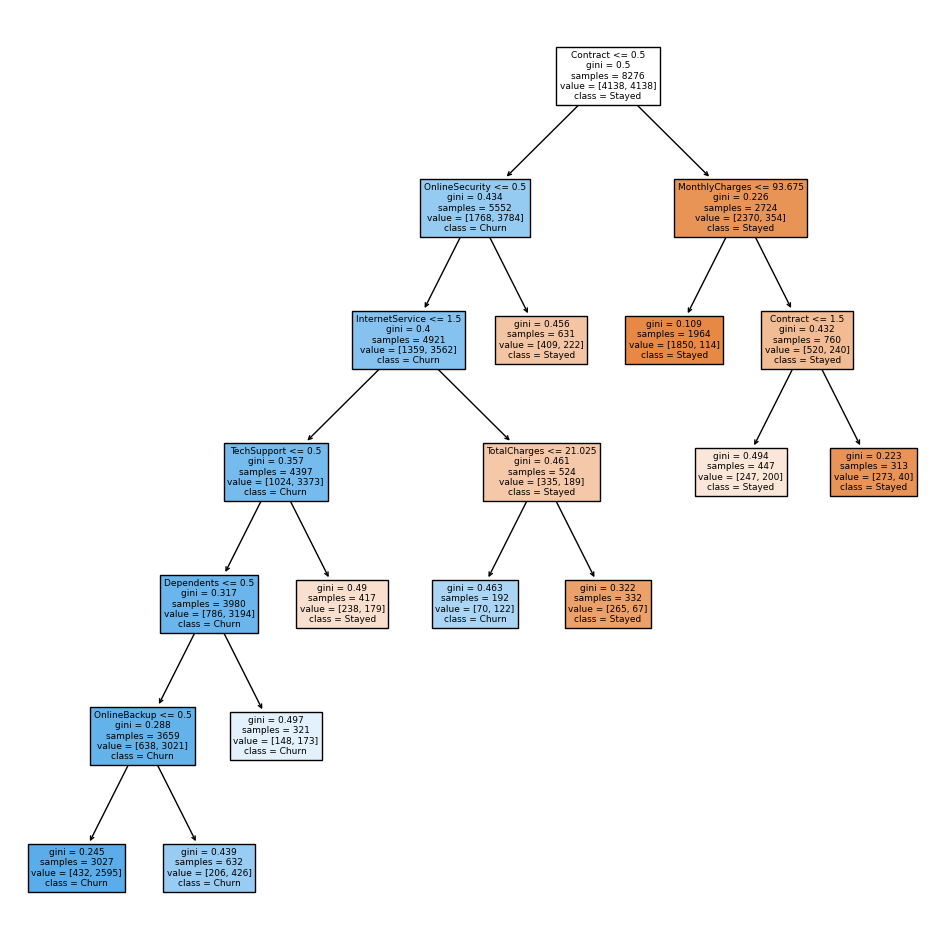

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt

# Membuat plot pohon keputusan
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(
    model_DT,
    feature_names = model_DT.feature_names_in_,
    class_names = ['Stayed', 'Churn'],
    filled=True
)

plt.show()

# Alternative Models

## KNN Model

Accuracy:  0.7132718239886444
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.72      0.79      1036
           1       0.47      0.69      0.56       373

    accuracy                           0.71      1409
   macro avg       0.67      0.70      0.67      1409
weighted avg       0.76      0.71      0.73      1409



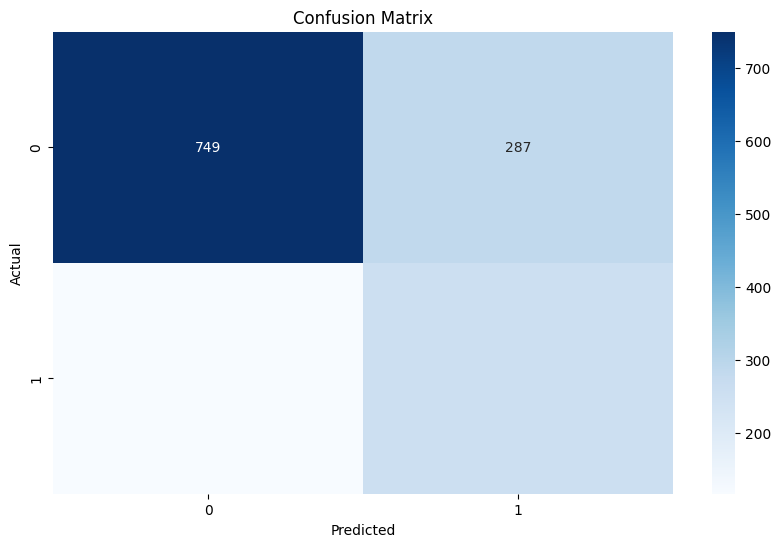

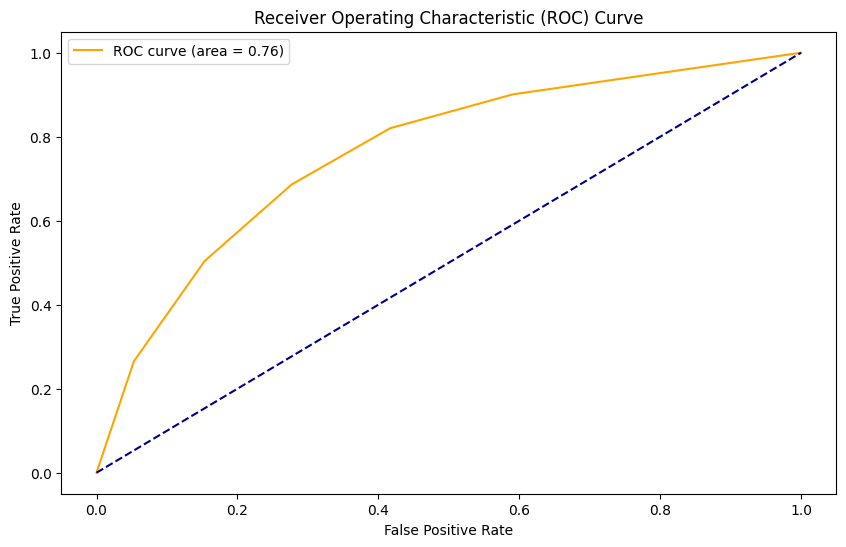

In [10]:
# train model using KNN
from sklearn.neighbors import KNeighborsClassifier

# Train Model
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

# Predict
y_pred_KNN = model_KNN.predict(X_test)

# Evaluate Model
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN, average="weighted")
recall_KNN = recall_score(y_test, y_pred_KNN, average="weighted")
f1_KNN = f1_score(y_test, y_pred_KNN, average="weighted")

print('Accuracy: ', accuracy_KNN)
print('Classification Report: \n', classification_report(y_test, y_pred_KNN))

# confusion matrix
conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_KNN, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_KNN.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## XGBoost Model

Accuracy:  0.7814052519517388
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1036
           1       0.58      0.60      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



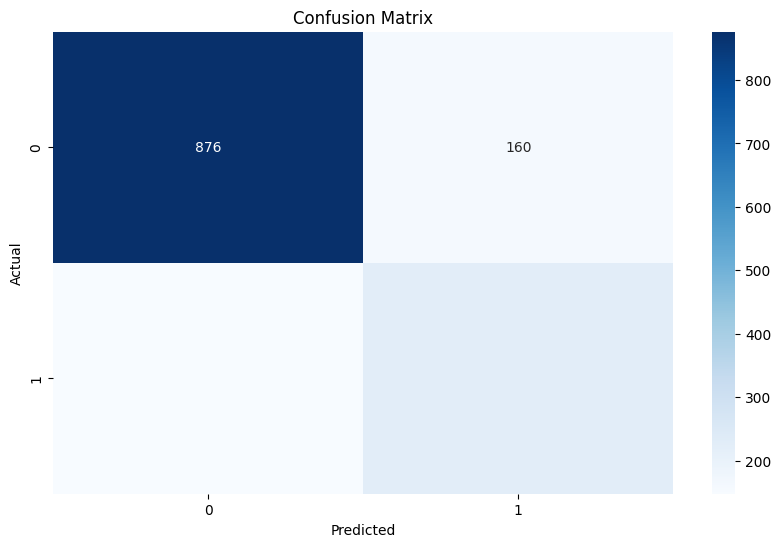

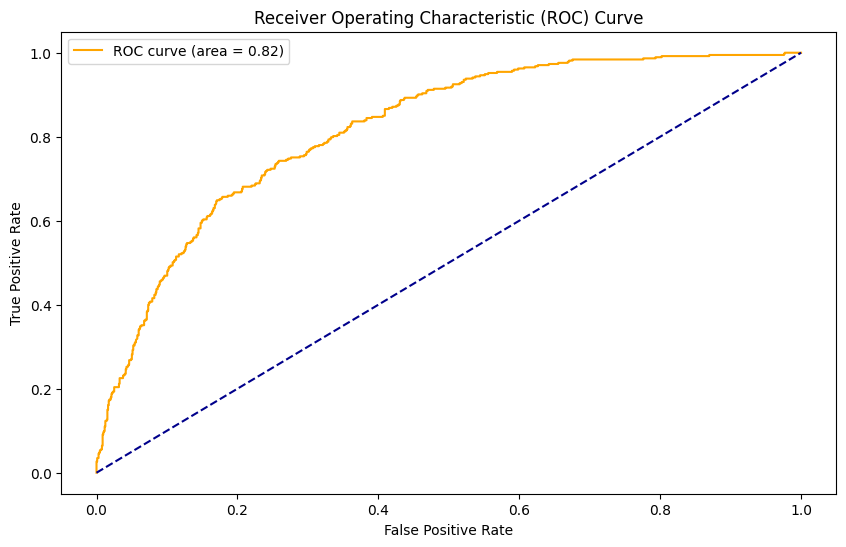

In [12]:
# train model using XGBoost
from xgboost import XGBClassifier

# Train Model
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)

# Predict
y_pred_XGB = model_XGB.predict(X_test)

# Evaluate Model
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
precision_XGB = precision_score(y_test, y_pred_XGB, average="weighted")
recall_XGB = recall_score(y_test, y_pred_XGB, average="weighted")
f1_XGB = f1_score(y_test, y_pred_XGB, average="weighted")

print('Accuracy: ', accuracy_XGB)
print('Classification Report: \n', classification_report(y_test, y_pred_XGB))

# confusion matrix
conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_XGB, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_XGB.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Result

In [13]:
from tabulate import tabulate

# Menyusun data hasil evaluasi ke dalam tabel
results = [{
    "Model": "Logistic Regression",
    "Accuracy": accuracy_LR,
    "Precision": precision_LR,
    "Recall": recall_LR,
    "F1 Score": f1_LR,
},
           {
    "Model": "Random Forest",
    "Accuracy": accuracy_RF,
    "Precision": precision_RF,
    "Recall": recall_RF,
    "F1 Score": f1_RF,
},
{
    "Model": "Decision Tree",
    "Accuracy": accuracy_DT,
    "Precision": precision_DT,
    "Recall": recall_DT,
    "F1 Score": f1_DT,
},
{
    "Model": "K-Nearest Neighbors",
    "Accuracy": accuracy_KNN,
    "Precision": precision_KNN,
    "Recall": recall_KNN,
    "F1 Score": f1_KNN,
},
{
    "Model": "XGBoost",
    "Accuracy": accuracy_XGB,
    "Precision": precision_XGB,
    "Recall": recall_XGB,
    "F1 Score": f1_XGB,
}]

# Menampilkan tabel hasil evaluasi
df_results = pd.DataFrame(results)
print(tabulate(df_results, headers="keys", tablefmt="fancy_grid"))

╒════╤═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│    │ Model               │   Accuracy │   Precision │   Recall │   F1 Score │
╞════╪═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│  0 │ Logistic Regression │   0.777147 │    0.805049 │ 0.777147 │   0.785636 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  1 │ Random Forest       │   0.76934  │    0.774942 │ 0.76934  │   0.771846 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  2 │ Decision Tree       │   0.760114 │    0.783408 │ 0.760114 │   0.768086 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  3 │ K-Nearest Neighbors │   0.713272 │    0.760742 │ 0.713272 │   0.727065 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  4 │ XGBoost             │   0.781405 │    0.783714 │ 0.781405 │   0.782499 │
╘════╧═════════════════════╧════════════

# Hyperparameter Tuning

### Import Required Libraries

In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import pandas as pd
import matplotlib.pyplot as plt
import shap

### Initialize Models

In [7]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

### Parameter Grids

In [8]:
param_grids = {
    "Logistic Regression": {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1],
        'colsample_bytree': [0.8, 1]
    }
}

### Hyperparameter Tuning

In [9]:
best_models = {}

for name, model in models.items():
    print(f"Tuning Hyperparameters for {name}")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2
    )
    
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"✅ Best Params for {name}: {grid_search.best_params_}\n")

Tuning Hyperparameters for Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Best Params for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Tuning Hyperparameters for Random Forest
Fitting 5 folds for each of 81 candidates, totalling 405 fits
✅ Best Params for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Tuning Hyperparameters for Decision Tree
Fitting 5 folds for each of 27 candidates, totalling 135 fits
✅ Best Params for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

Tuning Hyperparameters for KNN
Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Best Params for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Tuning Hyperparameters for XGBoost
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\fizuf\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\fizuf\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:52:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Params for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}



### Evaluate Models

In [10]:
evaluation_results = []

def evaluate_model(model, model_name, X_test, y_test):
    """
    Evaluate a model and return performance metrics.
    """
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    evaluation_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    # print(f"Evaluation Metrics for {model_name}:")
    # print(f"Accuracy: {accuracy:.4f}")
    # print(f"Precision: {precision:.4f}")
    # print(f"Recall: {recall:.4f}")
    # print(f"F1-Score: {f1:.4f}")
    # print("\nClassification Report:\n", classification_report(y_test, y_pred))
    # print("-" * 50)


for model_name, model in best_models.items():
    evaluate_model(model, model_name, X_test, y_test)


### Results

In [11]:
from tabulate import tabulate

results_df = pd.DataFrame(evaluation_results)

print(tabulate(results_df, headers="keys", tablefmt="fancy_grid"))

╒════╤═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│    │ Model               │   Accuracy │   Precision │   Recall │   F1-Score │
╞════╪═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│  0 │ Logistic Regression │   0.772179 │    0.552209 │ 0.737265 │   0.631458 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  1 │ Random Forest       │   0.767921 │    0.555556 │ 0.616622 │   0.584498 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  2 │ Decision Tree       │   0.748048 │    0.519481 │ 0.643432 │   0.57485  │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  3 │ KNN                 │   0.719659 │    0.479087 │ 0.675603 │   0.560623 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  4 │ XGBoost             │   0.76934  │    0.560914 │ 0.592493 │   0.576271 │
╘════╧═════════════════════╧════════════

### Feature Importance

✅ Extracted feature importance for Logistic Regression
✅ Extracted feature importance for Random Forest
✅ Extracted feature importance for Decision Tree
❌ Could not extract feature importance for KNN: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
✅ Extracted feature importance for XGBoost


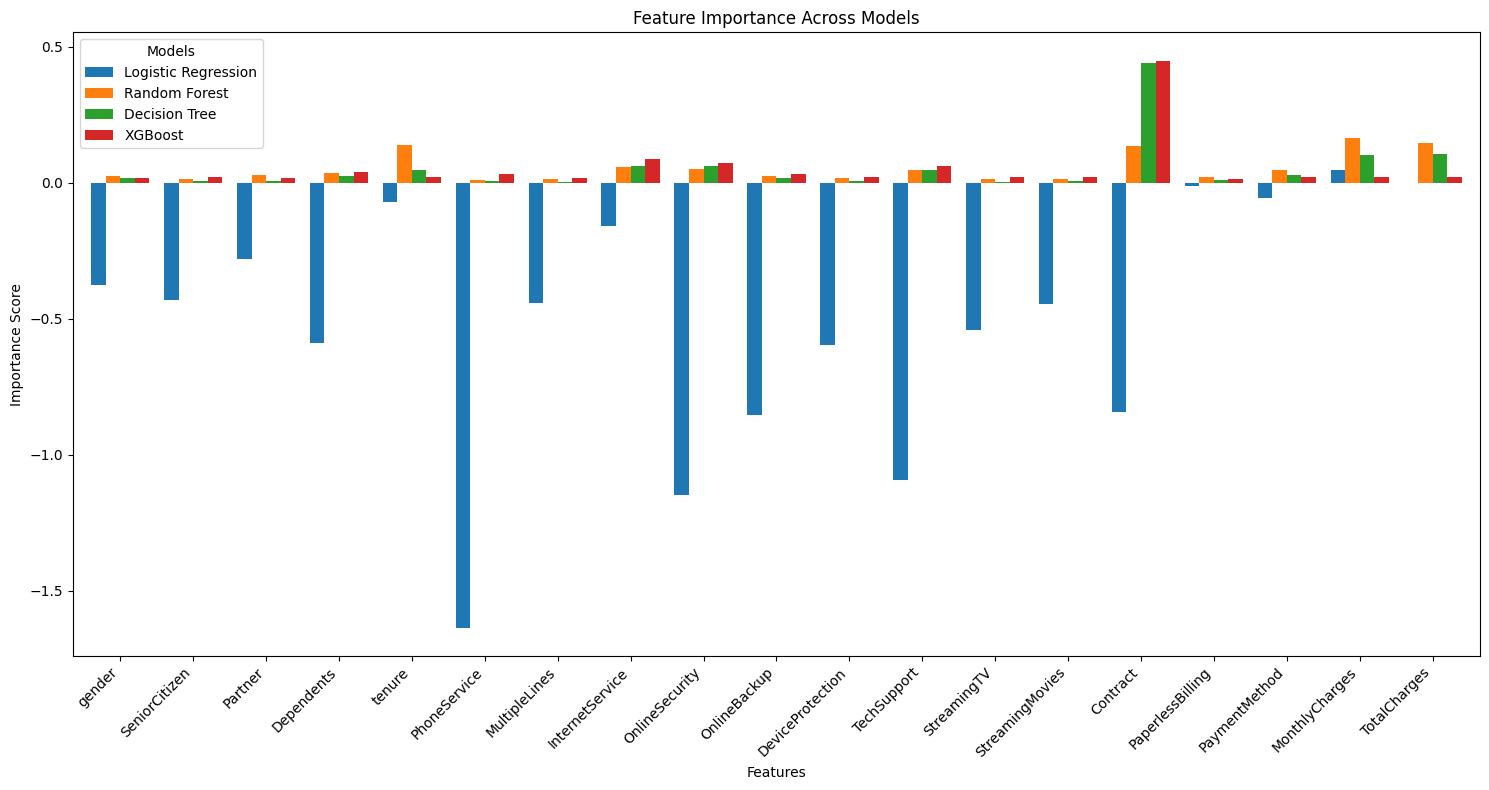

In [12]:
feature_importances = {}

def get_feature_importance(model, model_name, X_train):
    """
    Retrieve feature importance or coefficients from a model.
    """
    feature_names = X_train.columns
    
    if hasattr(model, 'feature_importances_'):  # Tree-based models
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):  # Logistic Regression
        importances = model.coef_[0]
    else:  # Use SHAP for unsupported models (like KNN)
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train)
        importances = np.abs(shap_values.values).mean(axis=0)

        # Visualize SHAP values
        shap.summary_plot(shap_values, X_train, plot_type="bar")  # Bar plot of feature importance
        shap.summary_plot(shap_values, X_train)  # Default summary plot
    
    feature_importances[model_name] = pd.Series(importances, index=feature_names)


for model_name, model in best_models.items():
    try:
        get_feature_importance(model, model_name, X_train)
        print(f"✅ Extracted feature importance for {model_name}")
    except Exception as e:
        print(f"❌ Could not extract feature importance for {model_name}: {e}")

feature_importance_df = pd.DataFrame(feature_importances).fillna(0)

feature_importance_df.plot(
    kind='bar',
    figsize=(15, 8),
    width=0.8
)
plt.title('Feature Importance Across Models')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.legend(title='Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
